# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


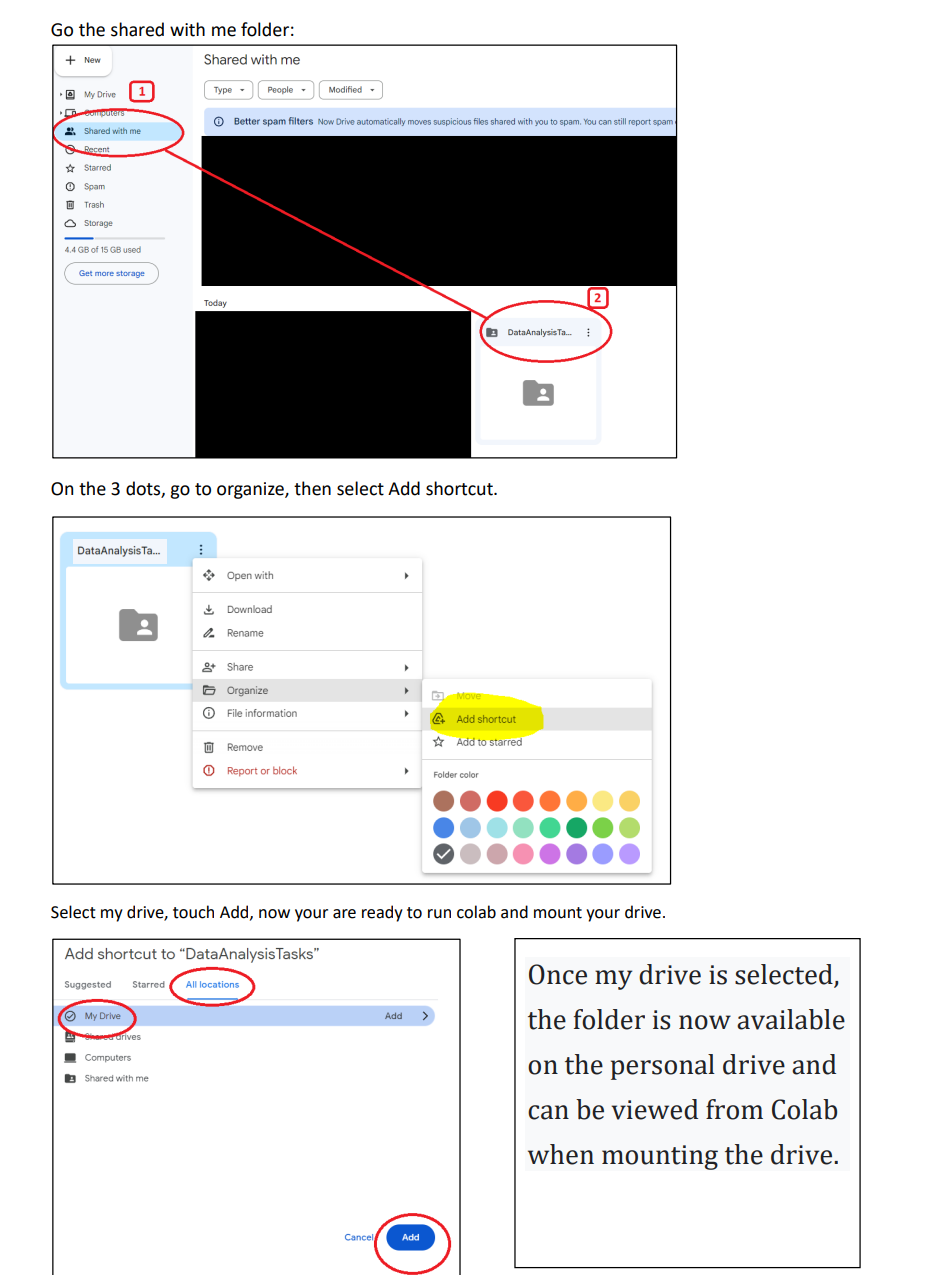

In [1]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/vehicle_insurance_claim_fraud_detection.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [2]:
# Library for data handling
import pandas as pd

# Library for interactive plotting
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, Whisker
from bokeh.transform import factor_cmap

# Read the data from the CSV file
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/vehicle_insurance_claim_fraud_detection.csv")

# Make sure 'DriverRating' and 'Age' columns are numeric
df['DriverRating'] = pd.to_numeric(df['DriverRating'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Convert 'DriverRating' column to str type for factor_cmap
df['DriverRating'] = df['DriverRating'].astype(str)

# Get unique ratings
ratings = df.DriverRating.unique()

# Compute quantiles
qs = df.groupby("DriverRating").Age.quantile([0.25, 0.5, 0.75])
qs = qs.unstack().reset_index()
qs.columns = ["DriverRating", "q1", "q2", "q3"]
df = pd.merge(df, qs, on="DriverRating", how="left")

# Compute IQR outlier bounds
iqr = df.q3 - df.q1
df["upper"] = df.q3 + 1.5*iqr
df["lower"] = df.q1 - 1.5*iqr

source = ColumnDataSource(df)

# Create figure
p = figure(
  x_range=ratings,
  title="Age distribution by driver rating",
  background_fill_color="#efefef",
  y_axis_label="Age",
  x_axis_label = 'Driver Rating'
)

# Outlier range
whisker = Whisker(
  base="DriverRating",
  upper="upper",
  lower="lower",
  source=source
)
whisker.upper_head.size = whisker.lower_head.size = 20
p.add_layout(whisker)

# Quantile boxes
cmap = factor_cmap("DriverRating", "Category10_4", ratings)
p.vbar("DriverRating", 0.7, "q2", "q3",
  source=source,
  fill_color=cmap,
  line_color="black"
)
p.vbar("DriverRating", 0.7, "q1", "q2",
  source=source,
  fill_color=cmap,
  line_color="black"
)

# Outliers
outliers = df[~df.Age.between(df.lower, df.upper)]
if not outliers.empty:
    p.circle(
      "DriverRating",
      "Age",
      source=ColumnDataSource(outliers),
      size=6,
      color="black",
      alpha=0.3
    )

# For better looks
p.xgrid.grid_line_color = None
p.axis.major_label_text_font_size="14px"
p.axis.axis_label_text_font_size="12px"

# Display the plot
output_notebook()
show(p)